## Discrete Measurement of the mass of a block

Consider the discrete measurement of the mass of a block using coins and a balance:
 * We place coins on the balance until the balance tilts, showing that the mass of the coins is greater than the mass of the block. We report the minimum number of coins that exceed the mass of the block.
 * To ensure that the measurement is reproducible:
   * The mass of each coin is an even number of grams
   * The mass of the block is an odd number of grams
   * The balance is well designed and lubricated. The difference of one gram will always tip the balance towards the more massive side.

### Model #1

 * the probability for any coin to be 10 g is p2, and the probability for any coin to be 8 g is p1 = 1 - p2.

### Interpreting the result

 * Can we report a point estimate for the mass of the block?
 * What are the confidence and credible intervals for the mass of the block?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Step 1: Model the experiment: for a given block mass, calculate the possible numbers of coins and the probabilities for each number of coins.

def get_probabilities(m_block, p2, m_coin1=8, m_coin2=10):
    """
    Calculate the possible outcomes for a given block mass and coin probabilities.

    Parameters:
    m_block (int): Mass of the block in grams.
    p2 (float): Probability of a coin being of second type.
    m_coin1 (int): Mass of the first type of coin in grams (default is 8 g).
    m_coin2 (int): Mass of the second type of coin in grams (default is 10 g).

    Returns:
    list: Possible numbers of coins and their probabilities.
    """
    # Iterate over possible numbers for the first type of coin
    probabilities = {}
    for n1 in range(0, m_block // m_coin1 + 2):
        # Calculate the remaining mass after using n1 coins of type 1
        remaining_mass = m_block - n1 * m_coin1
        if remaining_mass <= 0:
            n2 = 0
        else:
            n2 = remaining_mass // m_coin2 + 1
        n_tot = n1 + n2
        # Calculate the binomial probability for this combination
        prob = stats.binom.pmf(n2, n_tot, p2)
        if n_tot not in probabilities:
            probabilities[n_tot] = 0
        probabilities[n_tot] += prob

    # Normalize probabilities - subtle ordering issue not taken into account
    total_prob = sum(probabilities.values())
    for n in probabilities:
        probabilities[n] /= total_prob
    return probabilities

In [7]:
# Step 2: Test the model with p2 = 0.25

p2 = 0.25
m_block = 77  # Example block mass

probabilities = get_probabilities(m_block, p2)
# Print the probabilities for each number of coins
prob_tot = 0.
for n_coins, prob in probabilities.items():
    print(f"Number of coins: {n_coins}, Probability: {prob:.4f}")
    prob_tot += prob
print(f"Total Probability: {prob_tot:.4f}")

Number of coins: 8, Probability: 0.0003
Number of coins: 9, Probability: 0.3396
Number of coins: 10, Probability: 0.6601
Total Probability: 1.0000


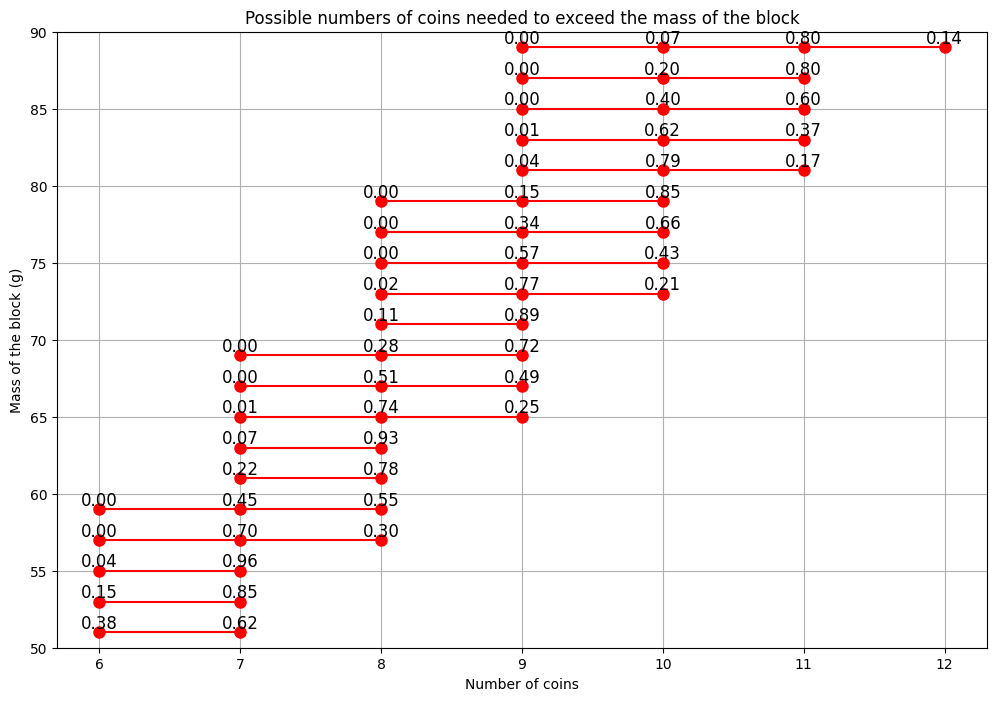

In [8]:
# Step 3: Show the possible outcomes (hozizontal axis) for block masses between 50 and 90 g (vertical axis). Indicate the probability of each outcome for a given mass by writing the value next to the point in the plot.

m_block_range = np.arange(51, 90, 2)  # odd block masses from 51 to 89 g
probabilities_all = {}
for m_block in m_block_range:
    probabilities = get_probabilities(m_block, p2)
    probabilities_all[m_block] = probabilities
# Make a plot
plt.figure(figsize=(12, 8))
for m_block in probabilities_all:
    probs = probabilities_all[m_block]
    coin_possibilities = list(probs.keys())
    plt.plot(coin_possibilities, [m_block]*len(coin_possibilities), 'ro-', markersize=8)

    for n_coins, prob in probs.items():
        plt.text(n_coins, m_block, f"{prob:.2f}", fontsize=12, ha='center', va='bottom')
plt.title("Possible numbers of coins needed to exceed the mass of the block")
plt.xlabel("Number of coins")
plt.ylabel("Mass of the block (g)")
plt.grid()
plt.ylim(50, 90)
plt.show()

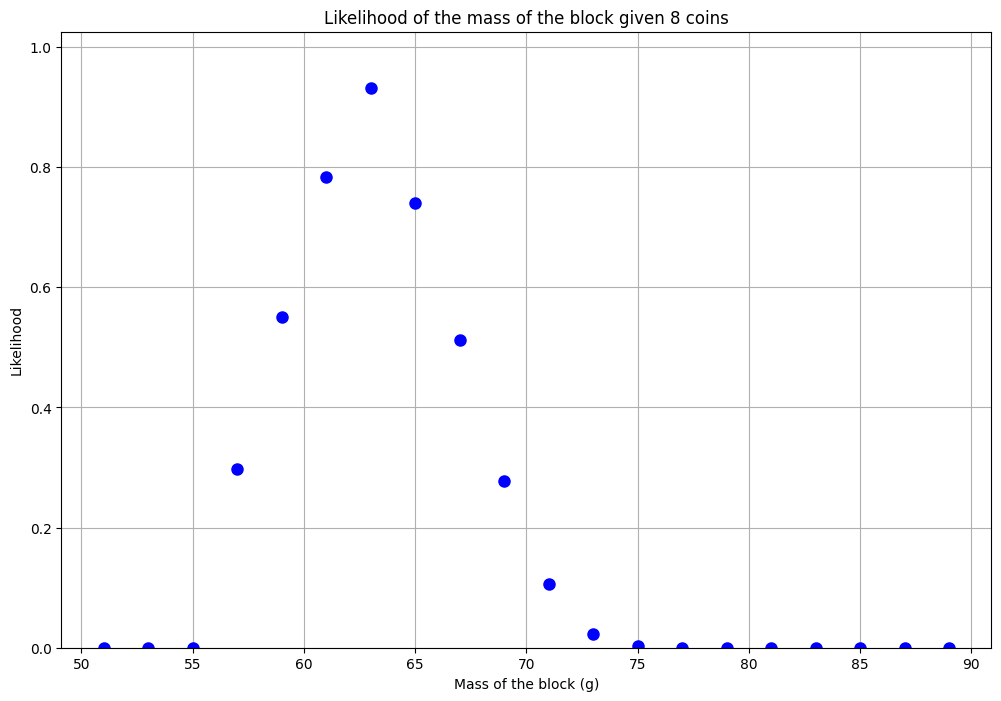

In [9]:
# Step 4: Define a likelihood function for the mass of the block
# Answer - it is already calculated

# Plot the likelihood function for a measurement of 8 coins

data = 8  # number of coins that exceeded the mass of the block

m_block_range = np.arange(51, 90, 2)  # odd block masses from 51 to 89 g
m_blocks = []
likelihoods = []
for m_block in m_block_range:
    probabilities = get_probabilities(m_block, p2)
    if data in probabilities:
        likelihood = probabilities[data]
    else:
        likelihood = 0.0
    m_blocks.append(m_block)
    likelihoods.append(likelihood)

# Make a plot
plt.figure(figsize=(12, 8))
plt.plot(m_blocks, likelihoods, 'bo', markersize=8)
plt.title("Likelihood of the mass of the block given 8 coins")
plt.xlabel("Mass of the block (g)")
plt.ylabel("Likelihood")
plt.grid()
plt.ylim(0, max(likelihoods) * 1.1)
plt.show()

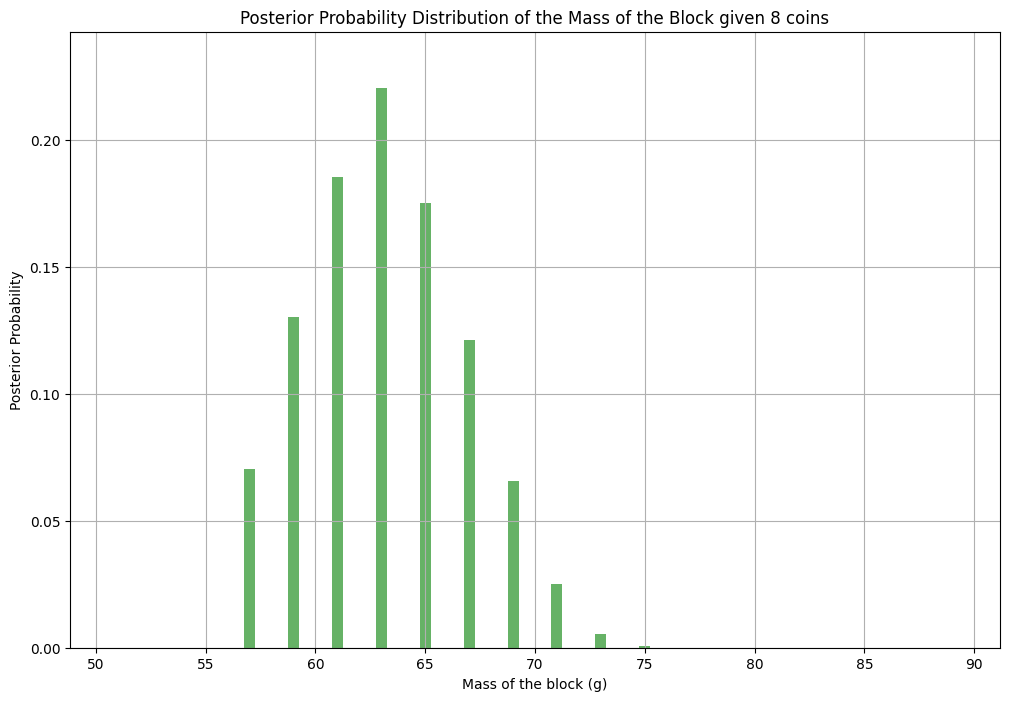

In [10]:
# Step 5: Define the posterior probability distribution for the mass of the block
# Answer: for a uniform prior, the posterior is proportional to the likelihood.
# We can simply normalize the likelihood function!

# Plot the posterior probability distribution for the mass of the block for a measurement of 8 coins

posterior_probabilities = [likelihood / sum(likelihoods) for likelihood in likelihoods]

plt.figure(figsize=(12, 8))
# make a bar plot of the posterior probabilities
plt.bar(m_blocks, posterior_probabilities, width=0.5, color='green', alpha=0.6, label='Posterior Probability')
#plt.plot(m_blocks, posterior_probabilities, 'go', markersize=8)
plt.title("Posterior Probability Distribution of the Mass of the Block given 8 coins")
plt.xlabel("Mass of the block (g)")
plt.ylabel("Posterior Probability")
plt.grid()
plt.ylim(0, max(posterior_probabilities) * 1.1)
plt.show()

In [ ]:
# Step 6: Find the point estimates for the mass of the block that can be reported if 8 coins were needed to exceed the mass of the block.

In [ ]:
# Step 7: Produce a confidence interval that can be reported for the mass of the block if 8 coins were needed to exceed the mass of the block.

In [ ]:
# Step 8: Produce a credible interval that can be reported for the mass of the block if 8 coins were needed to exceed the mass of the block.
